# Traffic Tickets

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file
from bokeh.io import output_notebook, show
from bokeh.charts import BoxPlot, Histogram, Bar
from bokeh.layouts import column,row
from bokeh.models import ColumnDataSource
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [2]:
#Traffic Tickets
#data is from data.ny.gov
#https://data.ny.gov/Transportation/Traffic-Tickets-Issued-Four-Year-Window/q4hy-kbtf

url = "https://data.ny.gov/resource/85dq-q63a.json"
tt0 = pd.read_json(url)

#Download the publicly available dataset
tt= pd.read_csv('G:/Python/Traffic_Tickets_Issued__Four_Year_Window.csv')


## Data extraction 

In [3]:
#Preview of the dataset
tt.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
0,4024,IMPROPER PLATES,2014,6,FRIDAY,45.0,F,NEW YORK,SYRACUSE POLICE DEPT,SYRACUSE CITY COURT,TSLED
1,37510A,NO MIRROR/NO LEFTSIDE VIEW MIRROR,2014,11,TUESDAY,22.0,M,NEW YORK,SUFFOLK COUNTY POLICE DEPT,SUFFOLK DISTRICT COURT,TSLED
2,1140A,FLD TO YLD RT-OF-WAY AT INTERSECTION,2014,8,THURSDAY,63.0,F,UNKNOWN,FREEPORT VILLAGE POLICE DEPT,FREEPORT VILLAGE COURT,TSLED
3,1225C2A,OPERATING MV MOBILE PHONE,2013,6,TUESDAY,36.0,F,CONNECTICUT,TRIBOROUGH BRIDGE TUNNEL AUTH,QUEENS NORTH TVB,TVB
4,1180D1A,SPEED IN ZONE 11-30,2014,5,MONDAY,62.0,M,NEW YORK,NYC POLICE DEPT,BROOKLYN SOUTH TVB,TVB


In [4]:
#Shape of the dataframe
print(tt.shape)

(14224866, 11)


In [5]:
#all the columns of the data frame
print(tt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14224866 entries, 0 to 14224865
Data columns (total 11 columns):
Violation Charged Code    object
Violation Description     object
Violation Year            int64
Violation Month           int64
Violation Day of Week     object
Age at Violation          float64
Gender                    object
State of License          object
Police Agency             object
Court                     object
Source                    object
dtypes: float64(1), int64(2), object(8)
memory usage: 1.2+ GB
None


In [6]:
#All the different kinds of Violation Description
vd = pd.DataFrame(tt['Violation Description'].unique())
vd

,0
0,IMPROPER PLATES
1,NO MIRROR/NO LEFTSIDE VIEW MIRROR
2,FLD TO YLD RT-OF-WAY AT INTERSECTION
3,OPERATING MV MOBILE PHONE
4,SPEED IN ZONE 11-30
5,INADEQUATE OR NO STOP LAMPS
6,AGGRAVATED UNLIC OPER 3RD MISD
7,DISOBEYED TRAFFIC DEVICE
8,INADEQUATE OR NO STOP LAMP OR LAMPS
9,FLD TO STOP AT STOP SIGN


## Question 

* Find out the relationship between Age and Speed types of Violation
* Find out the relationship between Age and Speed types of Violation by Gender
* Compare the Violation Tickets by Month
* Compare the Violation Ticket each yeat by days of week
* Find out the most happened violation of MA Drivers in New York State

## Predictive Question
* Using Linear Model to predict Violation Tickets as a function of the Age

Using the visulaization tools to help answering the questions

## Data Cleaning

In [7]:
#Remove incomplete rows
tt1 = tt.dropna()
tt1.shape

(14092577, 11)

In [8]:
#Remove the duplicate data
tt2 = tt1.drop_duplicates()
tt2.shape

(12090696, 11)

In [9]:
#Looking for the abnormal data
tt2.describe().astype(np.int64).T

,count,mean,std,min,25%,50%,75%,max
Violation Year,12090696,2013,1,2012,2013,2014,2014,2015
Violation Month,12090696,6,3,1,3,6,9,12
Age at Violation,12090696,36,13,16,25,34,47,95


In [10]:
#tt2['Age at Violation'] = tt2['Age at Violation'].astype(pd.np.int64)

In [11]:
#Basic information of dataframe after cleaning
tt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12090696 entries, 0 to 14224865
Data columns (total 11 columns):
Violation Charged Code    object
Violation Description     object
Violation Year            int64
Violation Month           int64
Violation Day of Week     object
Age at Violation          float64
Gender                    object
State of License          object
Police Agency             object
Court                     object
Source                    object
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ GB


## Data Visualization

### Seaborn

In [12]:
#All the questions related to speed violation
speed = tt2.loc[tt2['Violation Description'].str.contains('SPEED'),:]

#Preview of the dataframe of speed
speed.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
4,1180D1A,SPEED IN ZONE 11-30,2014,5,MONDAY,62.0,M,NEW YORK,NYC POLICE DEPT,BROOKLYN SOUTH TVB,TVB
13,1180D,SPEED IN ZONE,2012,2,SATURDAY,24.0,M,PENNSYLVANIA,BINGHAMTON STATE POLICE,TRIANGLE TOWN COURT,TSLED
15,1180D,SPEED IN ZONE,2012,4,THURSDAY,43.0,F,NEW YORK,LEWIS COUNTY SHERIFF,PORT LEYDEN VILLAGE COURT,TSLED
22,1180D,SPEED IN ZONE,2014,7,SATURDAY,48.0,M,NEW YORK,N SYRACUSE STATE POLICE,CICERO TOWN COURT,TSLED
26,1180D,SPEED IN ZONE,2014,5,SUNDAY,24.0,F,NEW YORK,COLONIE TOWN POLICE DEPT,COLONIE TOWN COURT,TSLED


#### relationship betweem Age and Speed types of Violation

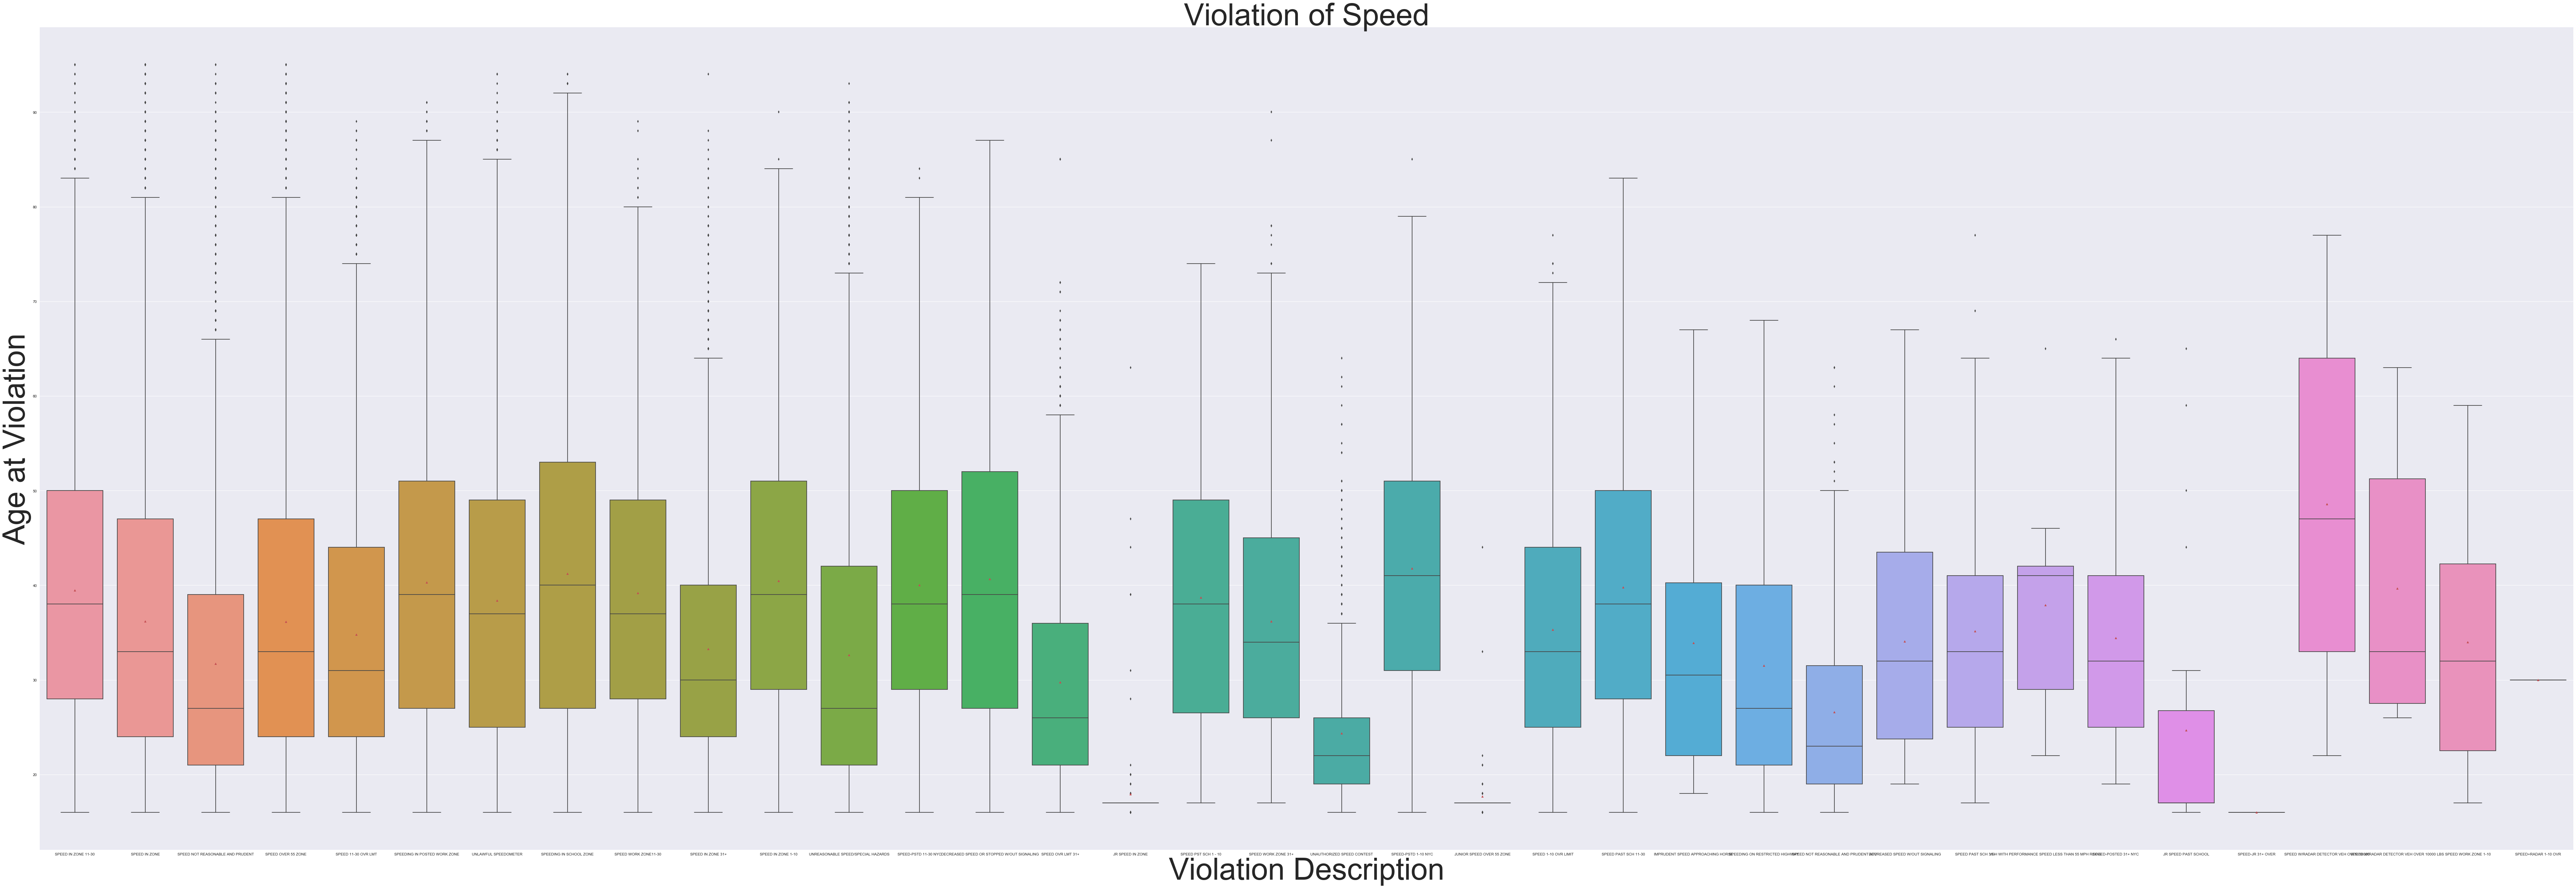

In [153]:
#Boxplot

#The Size of the chart
plt.figure(figsize=(120,40))

#The Size and Name of the title
plt.title('Violation of Speed',fontsize= 80)

#Using Seaborn Boxplot
sb = sns.boxplot(x= "Violation Description",y= "Age at Violation" ,data = speed, showmeans = True )

#X label and Y Label
sb.set_xlabel("Violation Description",fontsize=80)
sb.set_ylabel("Age at Violation",fontsize=80)
sns.set()

#Show the Boxplot
plt.show(sb)

#### Find out the relationship between Age and Speed types of Violation by Gender

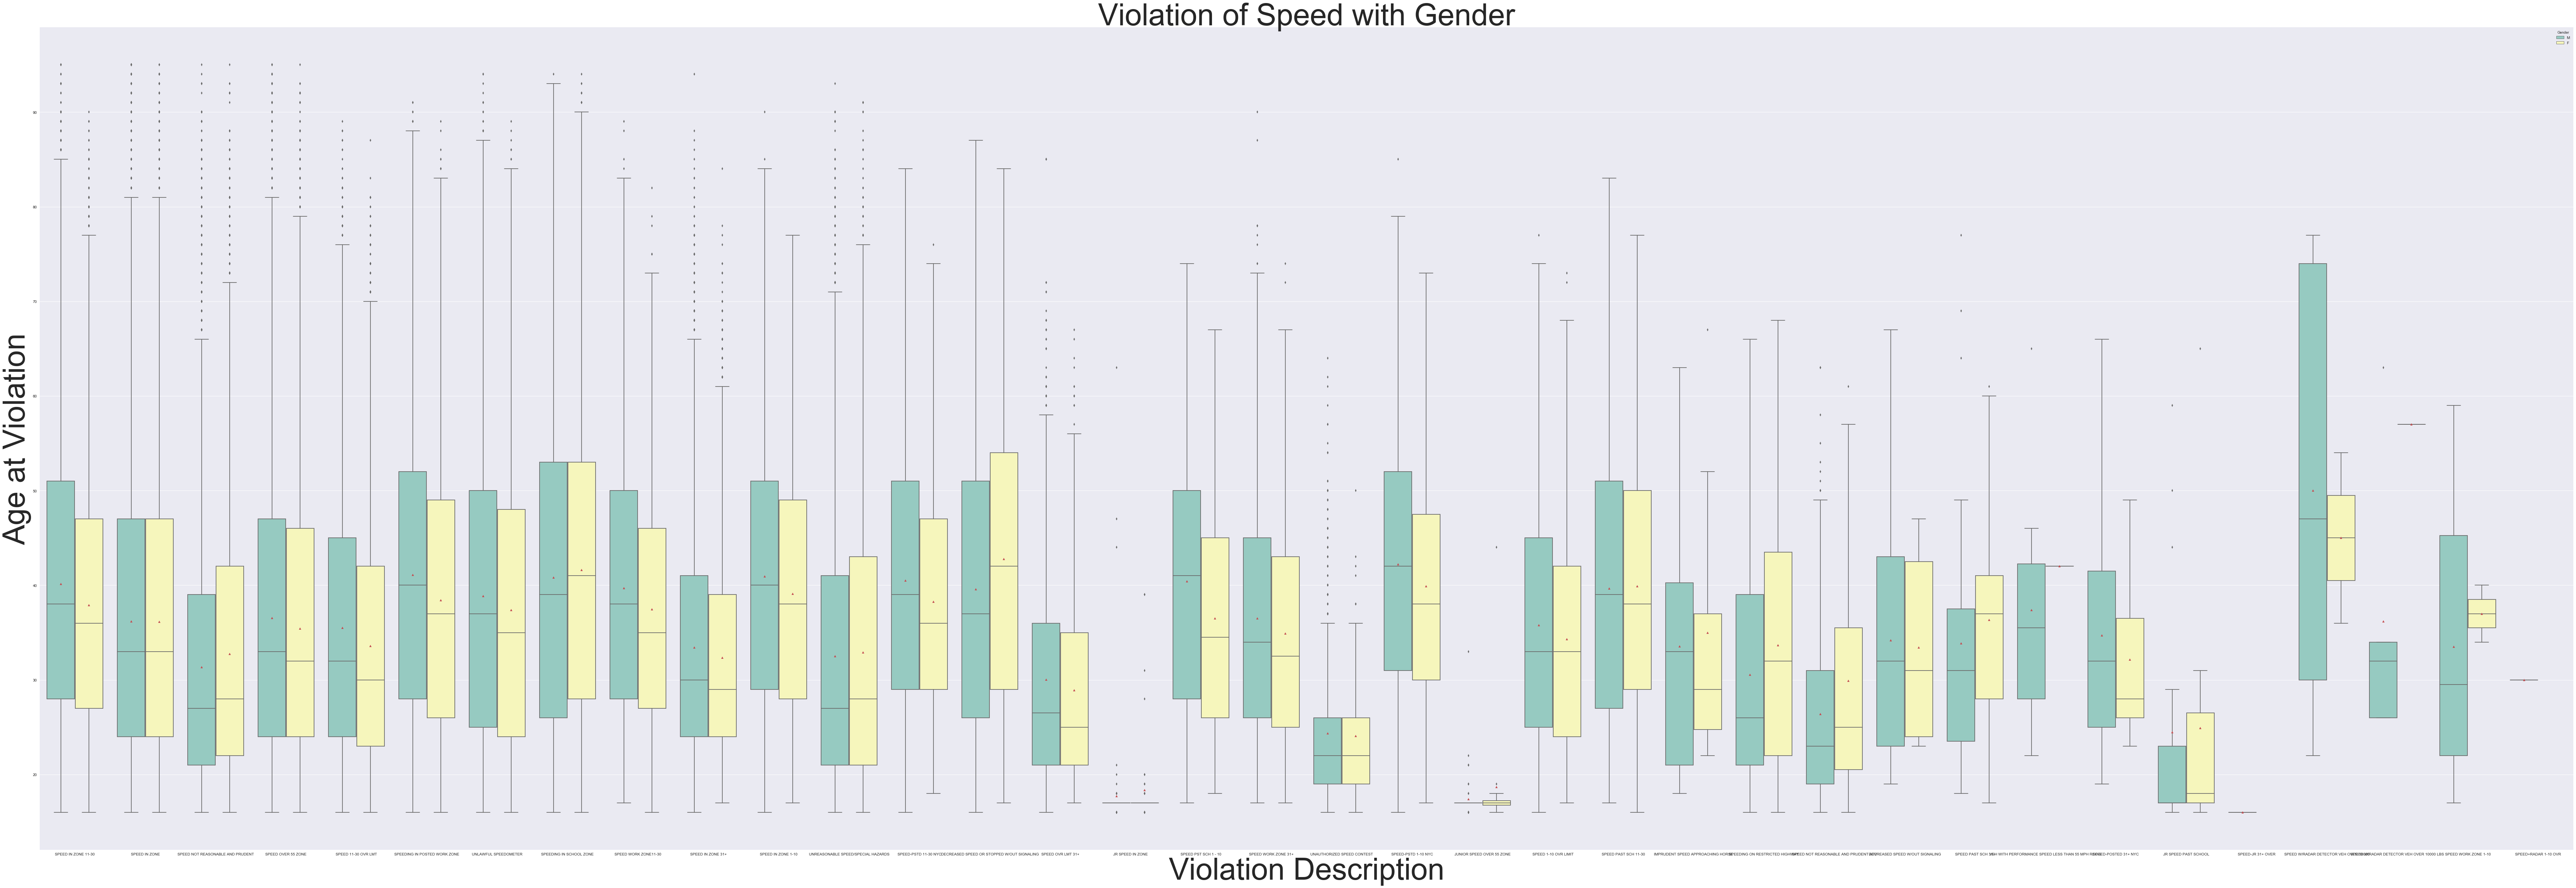

In [14]:
#Boxplot

#The Size of the chart
plt.figure(figsize=(120,40))

#The Size and Name of the title
plt.title('Violation of Speed with Gender',fontsize= 80)

#Using Boxplot
sbg = sns.boxplot(x= "Violation Description",y= "Age at Violation" ,hue = "Gender", palette="Set3", data = speed, showmeans = True )

#X label and Y Label
sbg.set_xlabel("Violation Description",fontsize=80)
sbg.set_ylabel("Age at Violation",fontsize=80)

plt.show(sbg)

#### Compare the Violation Tickets by Month

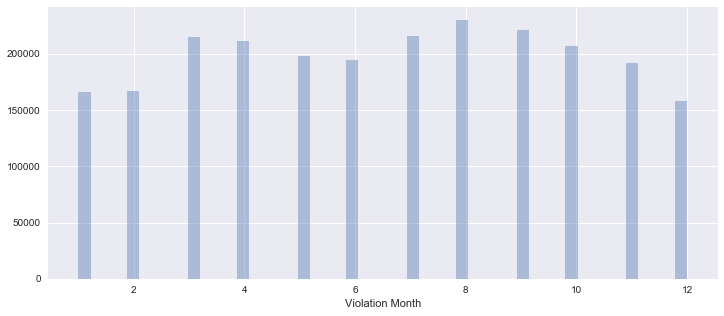

In [15]:
#The Size of the chart
plt.figure(figsize=(12,5))

#Using Distplot
shis =sns.distplot(speed['Violation Month'],kde= False,)

plt.show(shis)

#### Compare the Violation Ticket each yeat by days of week

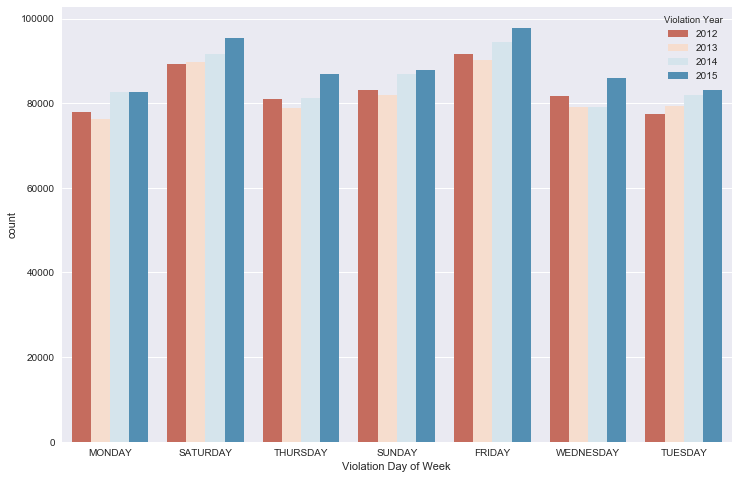

In [16]:
plt.figure(figsize=(12,8))
sbar =sns.countplot(x = 'Violation Day of Week',data= speed,hue="Violation Year",palette="RdBu" )
plt.show(sbar)

### Bokeh

In [17]:
#All the questions related to MA Drivers
ma = tt2.loc[tt2['State of License'].str.contains('MASS'),:]
ma.head()

,Violation Charged Code,Violation Description,Violation Year,Violation Month,Violation Day of Week,Age at Violation,Gender,State of License,Police Agency,Court,Source
29,1110A,DISOBEYED TRAFFIC DEVICE,2012,1,SUNDAY,51.0,M,MASSACHUSETTS,SCHODACK STATE POLICE,NASSAU TOWN COURT,TSLED
39,1180D1A,SPEED IN ZONE 11-30,2013,3,FRIDAY,22.0,M,MASSACHUSETTS,NYC POLICE DEPT,BRONX TVB,TVB
318,1110A,DISOBEYED TRAFFIC DEVICE,2014,7,SUNDAY,53.0,M,MASSACHUSETTS,NYC POLICE DEPT,BRONX TVB,TVB
414,1180D,SPEED IN ZONE,2012,8,MONDAY,55.0,M,MASSACHUSETTS,NORTHWAY IP STATE POLICE,CLIFTON PARK TOWN COURT,TSLED
574,1110A,DISOBEYED TRAFFIC DEVICE,2013,2,TUESDAY,45.0,M,MASSACHUSETTS,PLATTSBURGH STATE POLICE,PERU TOWN COURT,TSLED


#### Find out the most happened violation of MA Drivers in New York State

In [50]:
#Make a specific dataframe to show the count of each violation
mag = pd.DataFrame({'count': ma.groupby("Violation Description").size()}).reset_index()

# x and y axes
mavd = mag['Violation Description'].tolist()
count = mag['count'].tolist()

source = ColumnDataSource(dict(mavd=mavd, count=count))

p = figure(x_range=mavd,y_range=(0,30000), plot_height=850,plot_width=900, title="Counts of MA Driver's Violation")

p.vbar(x="mavd",top="count",width=1, source=source)
show(p)

## Descriptive/Predictive analytics

In [128]:
import statsmodels
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from sklearn import linear_model

### Using Linear Model to predict Violation Tickets as a function of the Age

In [119]:
ttg = pd.DataFrame({'count': tt2.groupby("Age at Violation").size()}).reset_index()
ttr = ttg.rename(columns={'Age at Violation':'Age'})

In [126]:
ttr.head()
ttr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
Age      80 non-null float64
count    80 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


### Statsmodels

In [118]:
model=smf.OLS(ttg['Age at Violation'],ttg['count'] )
result=model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Age at Violation   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     20.65
Date:                Thu, 29 Mar 2018   Prob (F-statistic):           1.96e-05
Time:                        17:18:31   Log-Likelihood:                -431.92
No. Observations:                  80   AIC:                             865.8
Df Residuals:                      79   BIC:                             868.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
count          0.0001   2.96e-05      4.544      0.000    7.56e-05       0.000
==============================================================================
Omnibus:                       34.180   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.716
Skew:                          -0.147   Prob(JB):                       0.0574
Kurtosis:                       1.724   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

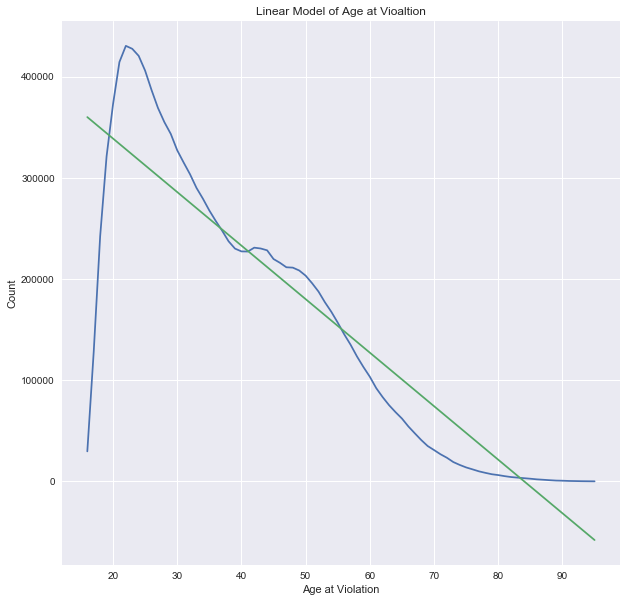

In [143]:
plt.figure(figsize=(10,10))
plt.plot(ttr['Age'], ttr['count'])
plt.plot(ttr.Age, results.fittedvalues)
plt.xlabel('Age at Violation')           # X-axis label
plt.ylabel('Count')              # Y-axis label
plt.title('Linear Model of Age at Vioaltion') # Overall title

In [137]:
model = smf.OLS.from_formula('count ~ Age', data = ttr)
results = model.fit()
print(results.params)

Intercept    444834.743249
Age           -5291.910689
dtype: float64


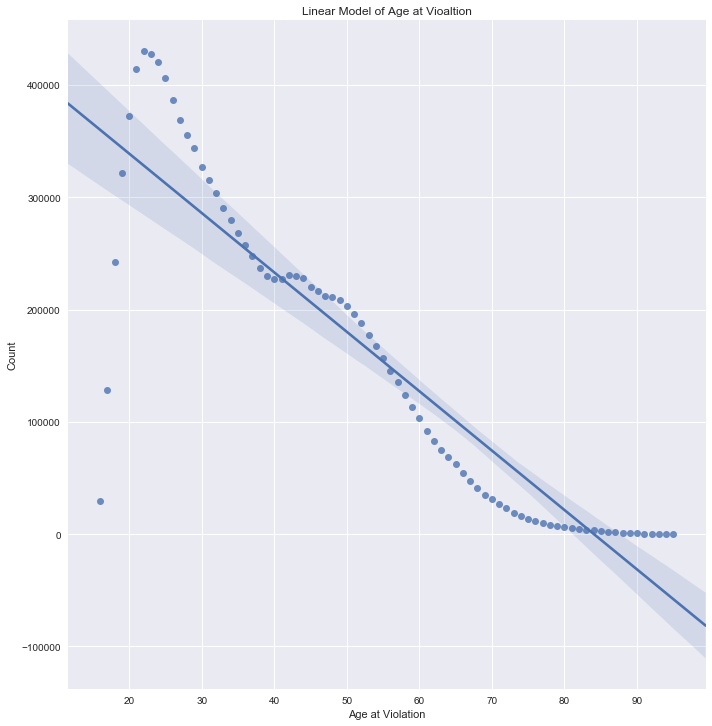

In [152]:
sns.lmplot(x='Age', y='count', data=ttr, size=10)
plt.xlabel('Age at Violation')           # X-axis label
plt.ylabel('Count')              # Y-axis label
plt.title('Linear Model of Age at Vioaltion') # Overall title

### Conclusion of Preditive Question

It is a very simple chart to the relationship between the age and violation tickets. As we can see, the total count 
of violation tickets decrease since 20 years old. The less violation tickets happen when the driver become older.
In fact, this chart can not get the conclusion that older people will get less violation tickets compared to young. 
In this dataset, we can said total count of violation tickets from young is much larger than olders'.

However, the trend line of the chart is too simple for this question. This trend line does not work with the age of driver 
between 16 to 20. Moreover, it is not accuately to show the total count of older than 50 years old.

I think it is not a good choice to use linear model for this question.
